Data from Kaggle

£apczyñski M., Bia³ow¹s S. (2013) Discovering Patterns of Users' Behaviour in an E-shop - 
Comparison of Consumer Buying Behaviours in Poland and Other European Countries, 
“Studia Ekonomiczne”, nr 151, “La société de l'information : perspective européenne et 
globale : les usages et les risques d'Internet pour les citoyens et les consommateurs”, p. 144-
153.

# Stage 1:

### Get to know the data

## Import Libraries

In [19]:
from pandas import read_csv
from matplotlib import pyplot as plt
from seaborn import barplot

## Import data

In [2]:
data = read_csv('e-shop clothing 2008.csv', delimiter=';')
eshopdata = data.copy()

Let's see what kind of data is stored in the dataset

In [3]:
eshopdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

So we have here a dataset with 165474 entries with non-null int64 (13 columns) and non-null object (1 column)

Let's see if there are null values 

In [4]:
eshopdata.isnull().sum()

year                       0
month                      0
day                        0
order                      0
country                    0
session ID                 0
page 1 (main category)     0
page 2 (clothing model)    0
colour                     0
location                   0
model photography          0
price                      0
price 2                    0
page                       0
dtype: int64

Let's take a look for random sample in the data

In [5]:
eshopdata.sample(10)

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
131723,2008,7,15,14,29,19320,1,A5,3,2,1,43,2,1
3500,2008,4,2,26,29,513,3,C38,13,1,1,38,2,3
19336,2008,4,10,3,29,2803,2,B1,4,1,1,57,1,1
132025,2008,7,15,4,29,19372,3,C38,13,1,1,38,2,3
151295,2008,7,31,16,29,22100,4,P4,4,2,1,38,1,1
42278,2008,4,26,5,29,6055,2,B2,3,1,2,57,1,1
13917,2008,4,7,21,29,2012,3,C11,7,4,1,33,2,1
17450,2008,4,9,5,29,2524,1,A42,6,2,1,28,2,3
165419,2008,8,13,15,29,24018,4,P3,2,1,1,48,1,1
162623,2008,8,10,4,9,23635,1,A1,8,1,1,28,2,1


## Stage 2:

### Data cleaning

It seems some columns in the data are not really important for the analysis so we can remove them

In [6]:
remove_cols = ['year','order','country','session ID','page 2 (clothing model)','colour','location','price 2','model photography']
eshopdata.drop(columns=remove_cols, inplace=True)

Now, let's rename columns

In [7]:
eshopdata = eshopdata.rename(columns = {'month': 'Month',
                                        'day': 'Day',
                                        'page 1 (main category)': 'Type',
                                        'price': 'Price',
                                        'page': 'Page'
                                       })

Now, let's convert the type to the related item

        1-trousers
        2-skirts
        3-blouses
        4-sale


In [8]:
eshopdata['Type'] = eshopdata['Type'].replace({
    1:'Trousers',
    2:'Skirts',
    3:'Blouses',
    4:'Sale'
})

Let's convert the month to the related value

        4-April
        5-May
        6-June
        7-July
        8-August

In [9]:
eshopdata['Month'] = eshopdata['Month'].replace({
    4: 'April',
    5: 'May',
    6: 'June',
    7:'July',
    8: 'August'
})

In [11]:
eshopdata.sample(10)

,Month,Day,Type,Price,Page
109842,June,25,Skirts,57,1
60430,May,12,Blouses,28,3
46860,April,29,Blouses,28,2
137998,July,21,Blouses,28,3
57355,May,9,Trousers,28,1
51168,May,4,Sale,38,1
77608,May,26,Sale,38,4
100826,June,16,Skirts,48,2
78613,May,27,Trousers,72,1
50849,May,3,Trousers,43,1


Now, the data is ready. Let's perform some analyses

## Stage 3:

### Data analysss

Let's see the number of sales per month

Text(0, 0.5, 'Number')

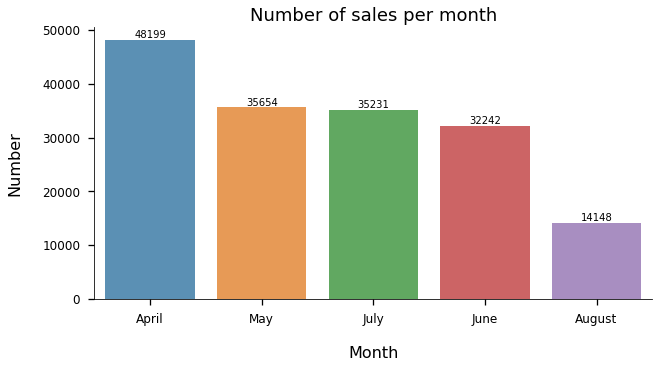

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
salesPerMonth = eshopdata['Month'].value_counts().sort_values(ascending=False).to_frame(name='number')
salesPerMonth.reset_index(inplace=True)
plot = barplot(x='index', y='number', data=salesPerMonth, alpha=.8)
plot.bar_label(plot.containers[0])
ax.tick_params(length=6, width=1.3, pad=8, labelsize=12)
ax.spines[['right', 'top']].set_visible(False)
ax.set_title('Number of sales per month', fontsize=18)
plt.xlabel('Month', fontsize=16, labelpad=20)
plt.ylabel('Number', fontsize=16, labelpad=20)

April has the highest number of sales and August has the fewest.

August seems so few here. Let's take a look the sales for each day of the month and find what makes August so few.

In [35]:
df = eshopdata.groupby('Month')['Day'].value_counts()

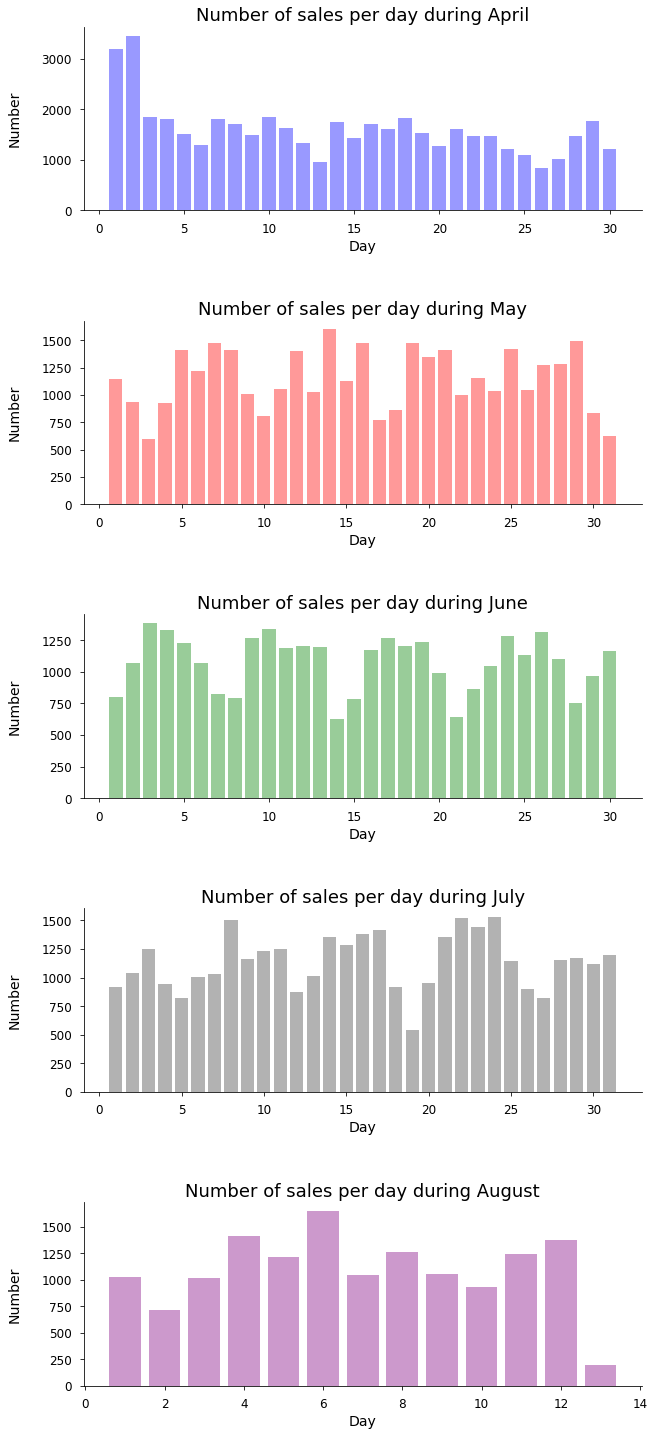

In [60]:
fig, ax1 = plt.subplots(nrows=eshopdata['Month'].nunique(), figsize=(10,25))
i=0
for month in eshopdata['Month'].unique():
    ax1[i].set_xlabel('Day', fontsize=14)
    ax1[i].set_ylabel('Number', fontsize=14, labelpad=20)
    ax1[i].tick_params(length=4, pad=8, labelsize=12)
    ax1[i].set_title(f'Number of sales per day during {month}', fontsize=18)
    ax1[i].spines[['right', 'top']].set_visible(False)
    plt.subplots_adjust(hspace=0.6)
    if month == 'April':
        ax1[i].bar(df[month].sort_index().keys(), df[month].sort_index().values, color='blue', alpha=0.4)
    if month == 'May':
        ax1[i].bar(df[month].sort_index().keys(), df[month].sort_index().values, color='red', alpha=0.4)
    if month == 'June':
        ax1[i].bar(df[month].sort_index().keys(), df[month].sort_index().values, color='green', alpha=0.4)
    if month == 'July':
        ax1[i].bar(df[month].sort_index().keys(), df[month].sort_index().values, color='gray', alpha=0.6)
    if month == 'August':
        ax1[i].bar(df[month].sort_index().keys(), df[month].sort_index().values, color='purple', alpha=0.4)
    i = i + 1

From the plot, we can see that (1st to 14th) only half of the data were recorded during August that is why August has the fewest sales. And April has the highest sales during the first two days.

Let's see when the sales peak for all months

Text(0, 0.5, 'Number')

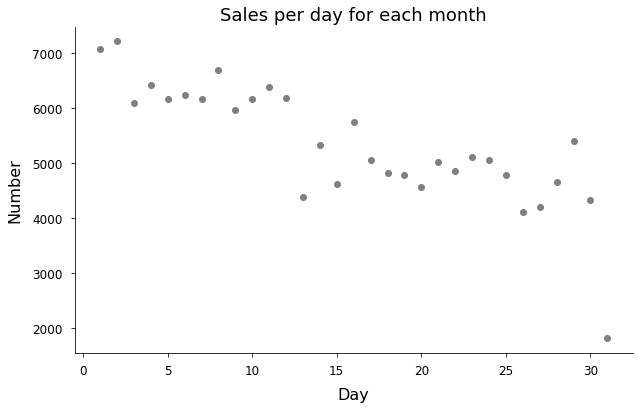

In [83]:
fig, ax2 = plt.subplots(figsize=(10,6))
x=eshopdata['Day'].value_counts().keys()
y=eshopdata['Day'].value_counts().values
ax2.scatter(x=x, y=y, color='gray')
ax2.tick_params(labelsize=12, pad=8, length=4)
ax2.set_title('Sales per day for each month', fontsize=18)
ax2.spines[['top','right']].set_visible(False)
plt.xlabel('Day', fontsize=16, labelpad=10)
plt.ylabel('Number', fontsize=16, labelpad=10)

The peak can be located during the start of each month, and then descrease as the month goes on.

Now, let's visualize again but without the data from August and see if it affects the peak.

In [84]:
eshopData_withoutAugust = eshopdata[eshopdata['Month']!='August']

Text(0, 0.5, 'Number')

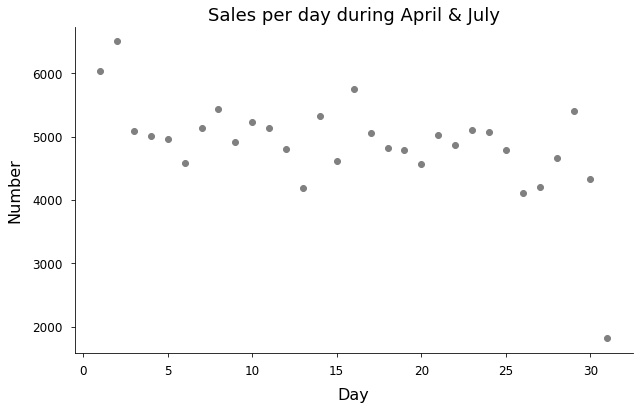

In [86]:
fig, ax3 = plt.subplots(figsize=(10,6))
x=eshopData_withoutAugust['Day'].value_counts().keys()
y=eshopData_withoutAugust['Day'].value_counts().values
ax3.scatter(x=x, y=y, color='gray')
ax3.tick_params(labelsize=12, pad=8, length=4)
ax3.set_title('Sales per day during April & July', fontsize=18)
ax3.spines[['top','right']].set_visible(False)
plt.xlabel('Day', fontsize=16, labelpad=10)
plt.ylabel('Number', fontsize=16, labelpad=10)

We still get the peak on the start of the month. 

Removing data from August do not really affects the result

Let's see the sales per clothing type.

Text(0, 0.5, 'Average cost')

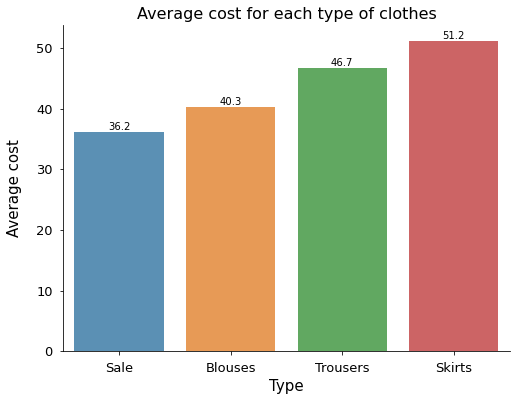

In [39]:
fig, ax4 = plt.subplots(figsize=(8,6))
salesPerType = eshopdata.groupby('Type').mean()['Price'].sort_values(ascending=True).to_frame()
salesPerType.reset_index(inplace=True)
salesPerType['Price']=salesPerType['Price'].apply(lambda x: round(x,1))

# Bar plot
plot3 = barplot(x='Type', y='Price', data=salesPerType, alpha=.8)
plot3.bar_label(plot3.containers[0])
ax4.spines[['top','right']].set_visible(False)
ax4.set_title('Average cost for each type of clothes', fontsize=16)
ax4.tick_params(pad=7, labelsize=13)
ax4.set_xlabel('Type', fontsize=15)
ax4.set_ylabel('Average cost', fontsize=15, labelpad=14)

Skirts are the most expansive in average amoung the item sold


Let's check the number of item sold

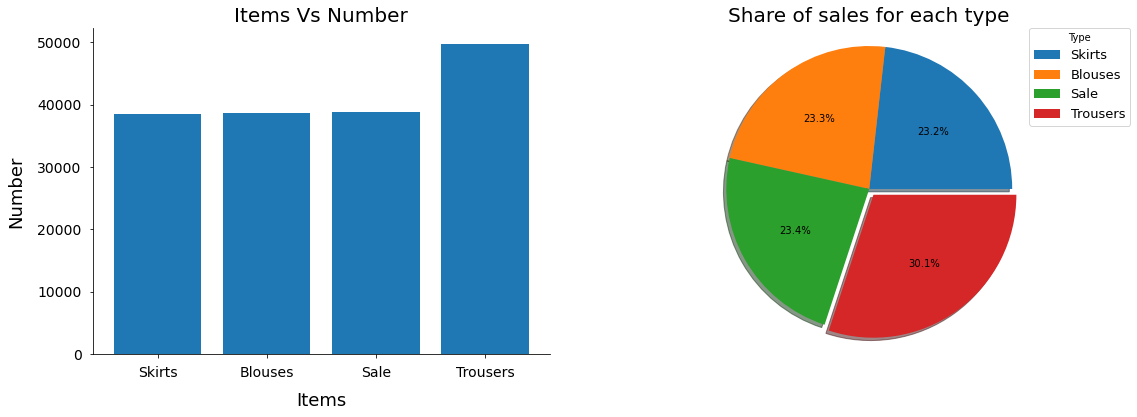

In [75]:
itemSold = eshopdata['Type'].value_counts().sort_values(ascending=True)
fig, ax5 = plt.subplots(nrows = 1, ncols=2, figsize=(18,6))

# Bar plot
ax5[0].bar(itemSold.keys(), itemSold.values)
ax5[0].tick_params(pad=8, labelsize=14)
ax5[0].spines[['top','right']].set_visible(False)
ax5[0].set_title('Items Vs Number', fontsize=20)
ax5[0].set_xlabel('Items', fontsize=18, labelpad=12)
ax5[0].set_ylabel('Number', fontsize=18, labelpad=12)

# Pie plot
ax5[1].pie(itemSold.values, explode=(0, 0, 0, 0.05), autopct='%1.1f%%',
          shadow=True)
ax5[1].axis('equal')
ax5[1].set_title('Share of sales for each type', fontsize=20)
ax5[1].legend(itemSold.keys(), fontsize=13, title='Type',loc=(0.85,0.7))

Now let's check the revenue generated by each item

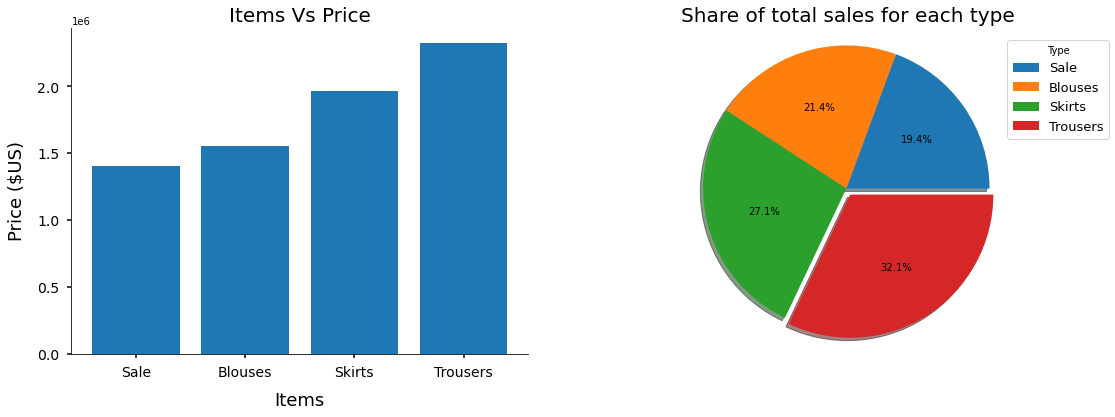

In [81]:
revenue = eshopdata.groupby('Type')['Price'].sum().sort_values(ascending=True)
fig, ax6 = plt.subplots(nrows = 1, ncols=2, figsize=(18,6))

# Bar plot
ax6[0].bar(revenue.keys(), revenue.values)
ax6[0].tick_params(pad=8, labelsize=14, length=4, width=1.5)
ax6[0].spines[['top','right']].set_visible(False)
ax6[0].set_title('Items Vs Price', fontsize=20)
ax6[0].set_xlabel('Items', fontsize=18, labelpad=12)
ax6[0].set_ylabel('Price ($US)', fontsize=18, labelpad=12)

# Pie plot
ax6[1].pie(revenue.values, explode=(0, 0, 0, 0.05), autopct='%1.1f%%',
          shadow=True)
ax6[1].axis('equal')
ax6[1].set_title('Share of total sales for each type', fontsize=20)
ax6[1].legend(revenue.keys(), fontsize=13, title='Type',loc=(0.85,0.66))

Since skirts are the expansive item here, it is kind obvious that they are the least sold item. And trousers are on the top of item that were sold even if they are the second most expansive (average price $46.7).

But skirts is the second item that generate a lot of dollars even they are the least sold item. This is compensated by the fact that they have the higher average price.
